# House Sales in King County, USA
----

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

**id** :a notation for a house

**date**: Date house was sold

**price**: Price is prediction target

**bedrooms**: Number of Bedrooms/House

**bathrooms**: Number of bathrooms/bedrooms

**sqft_living**: square footage of the home

**sqft_lot**: square footage of the lot

**floors** :Total floors (levels) in house

**waterfront** :House which has a view to a waterfront

**view**: Has been viewed

**condition** :How good the condition is Overall

**grade**: overall grade given to the housing unit, based on King County grading system

**sqft_above** :square footage of house apart from basement

**sqft_basement**: square footage of the basement

**yr_built** :Built Year

**yr_renovated** :Year when house was renovated

**zipcode**:zip code

**lat**: Latitude coordinate

**long**: Longitude coordinate

**sqft_living15** :Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

**sqft_lot15** :lotSize area in 2015(implies-- some renovations)

In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import gmaps
import os

# Importing Data

- Load and read csv file

In [2]:
# File to Load:
file_to_load='kc_house_data.csv' 

# Read kc_house_data csv file and store into data frame:
kc_house_data_df=pd.read_csv(file_to_load)
kc_house_data_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Slicing Data
- Only display in dataframe columns: 'id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'yr_built', 'zipcode', 'lat', 'long'

In [3]:
# Columns to display
house_data_df = kc_house_data_df[['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 
                                  'waterfront', 'yr_built', 'zipcode', 'lat', 'long']]

# Formatting
#house_data_df.style.format({"price": "${:,.2f}", "bathrooms":"{:.2f}"})

house_data_df.head()



,id,price,bedrooms,bathrooms,sqft_living,waterfront,yr_built,zipcode,lat,long
0,7129300520,221900.0,3,1.00,1180,0,1955,98178,47.5112,-122.257
1,6414100192,538000.0,3,2.25,2570,0,1951,98125,47.7210,-122.319
2,5631500400,180000.0,2,1.00,770,0,1933,98028,47.7379,-122.233
3,2487200875,604000.0,4,3.00,1960,0,1965,98136,47.5208,-122.393
4,1954400510,510000.0,3,2.00,1680,0,1987,98074,47.6168,-122.045


# Statiscal Summary
- Obtain statiscal summary of dataframe

In [ ]:
house_data_df.describe()

In [ ]:
house_data_df.dtypes

# 1. What’s the average amount of bedrooms and bathrooms in a house and is the price higher when the house has more bedrooms or bathrooms?

In [ ]:
# Calculate average amount of bedrooms
avg_bedroom = house_data_df['bedrooms'].mean()
print(f" The average amount of bedrooms in a house is {round(avg_bedroom,0)}")


# Calculate average amount of bathrooms
avg_bathroom = house_data_df['bathrooms'].mean()
print(f" The average amount of bathrooms in a house is {round(avg_bathroom,2)}")

Scatter plots with linear regression and r-squared value (bedrooms vs. price and bathrooms vs. price) 

In [ ]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = house_data_df['bedrooms']
y_values = house_data_df['price']

# Perform a linear regression on wind speed vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('bedrooms vs. price', fontsize=20)
plt.ylabel('price (in millions)', fontsize=16, color='black')
plt.xlabel('bedrooms', fontsize=16, color='black')
plt.annotate(line_eq,(15,8.000000e+04), fontsize=18, color='darkred')
#plt.grid(False)


# Print r-squared value:
print(f'The r-squared is: {rvalue}')

# Save the figure:
# plt.savefig('output_data/Bedrooms vs. Price.png')

# Show plot:
plt.show()

In [ ]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = house_data_df['bathrooms']
y_values = house_data_df['price']

# Perform a linear regression on wind speed vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('bathrooms vs. price', fontsize=20)
plt.ylabel('price (in millions)', fontsize=16, color='black')
plt.xlabel('bathrooms', fontsize=16, color='black')
plt.annotate(line_eq,(2,7.000000e+06), fontsize=18, color='darkred')
#plt.grid(False)


# Print r-squared value:
print(f'The r-squared is: {rvalue}')

# Save the figure:
# plt.savefig('output_data/Bathrooms vs. Price.png')

# Show plot:
plt.show()

# 2. What’s the correlation between sqft_living and pricing and do larger sqft_living greater than 6,000 sqft with a waterfront view cost more or less than those without a waterfront view?

Scatter plot with linear regression and r-squared value (sqft_living vs. price)

Dataframe for larger sqft_living greater than 6,000 sqft with waterfront view and without waterfront view price columns

Scatter plots with linear regression and r-squared value (larger sqft_living greater than 6,000 sqft with waterfront view and without waterfront view vs. price)

# 3. Are house sale prices higher in higher income neighborhoods?

Scatter plot with linear regression and r-squared value (zipcode vs. price) 

Dataframe for 10 most expensive houses by neighborhood zipcode include lat, lng, House ID, Price, and zipcode columns

Plot markers for top 10 most expensive houses by neighborhood zipcode or lat and lng on a map with pins containing House ID, Price, and zipcode

# 4. Do houses with a waterfront view or without a waterfront view have more price outliers?

Waterfront vs. Non_waterfront house prices analysis using pie and bar chart 

In [ ]:
# Non_waterfront only
non_wf=house_data_df.loc[house_data_df["waterfront"]==0]
non_wf
non_wf.count()["id"]


In [ ]:
# waterfront properties only
wf=house_data_df.loc[house_data_df["waterfront"]==1]
wf
wf.count()["id"]

Pie chart to show waterfront vs non-waterfront properties

In [ ]:
labels = ["Waterfront", "Non-waterfront"]

# The values of each section of the pie chart - from waterfront and non waterfront properties count
sizes = [163, 21450]

# The colors of each section of the pie chart
colors = ["red", "lightblue"]


explode = (0.5, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.savefig('output_data/ waterfront vs nonwaterfront piechart.png')
plt.show()

In [ ]:
bins = [0,1000,2000,3000,4000,5000,6000,7000]
group_label=["<1000", "1000-2000", "2000-3000", "3000-4000","4000-5000","5000-6000",">6000"]
pd.cut(wf["sqft_living"], bins, labels=group_label).head()

In [ ]:
wf["living_sqft_range"]=pd.cut(wf["sqft_living"], bins, labels=group_label)
wfrange=wf.groupby(["living_sqft_range"])
wfrange_df=wfrange['price','bedrooms','bathrooms'].median()
print(wfrange_df)

In [ ]:
bins = [0,1000,2000,3000,4000,5000,6000,7000]
group_label=["<1000", "1000-2000", "2000-3000", "3000-4000","4000-5000","5000-6000",">6000"]
pd.cut(non_wf["sqft_living"], bins, labels=group_label).head()

In [ ]:
non_wf["living_sqft_range"]=pd.cut(non_wf["sqft_living"], bins, labels=group_label)
non_wfrange=non_wf.groupby(["living_sqft_range"])
non_wfrange_df=non_wfrange['price','bedrooms','bathrooms'].median()
print(non_wfrange_df)

In [ ]:
wf_vs_non=pd.merge(wfrange_df,non_wfrange_df, how="left", on = ["living_sqft_range"])

wfnon_df = wf_vs_non.rename(columns={"price_x":"price_wf",
                                    "bedrooms_x":"bedrooms_wf",
                                    "bathrooms_x":"bathrooms_wf",
                                    "price_y":"price_nonwf",
                                    "bedrooms_y":"bedrooms_nonwf",
                                    "bathrooms_y": "bathrooms_nonwf"})

wfnon_df

In [ ]:
wfnon_df=wfnon_df.reset_index(level=0)

In [ ]:
wfnon_df

In [ ]:
pandas_bar=wfnon_df
pandas_bar.plot(kind="bar",x="living_sqft_range", y=["price_wf","price_nonwf"],rot=45)

plt.xlabel("Living Sqft Range")
plt.ylabel("Prices (Millions)")
plt.title("Waterfront vs. Non-Waterfront")
plt.savefig('output_data/ waterfront vs nonwf price barchart.png')
plt.show()

Scatter plot with linear regression and r-squared value (waterfront bedrooms vs. price) 

In [ ]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = wf['bedrooms']
y_values = wf['price']

# Perform a linear regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Waterfront bedrooms vs. prices', fontsize=20)
plt.ylabel('price (in millions)', fontsize=16, color='black')
plt.xlabel('bedrooms', fontsize=16, color='black')
plt.annotate(line_eq,(3,4000000), fontsize=18, color='darkred')
#plt.grid(False)


# Print r-squared value:
print(f'The r-squared is: {rvalue}')

# Save the figure:
plt.savefig('output_data/Waterfront Bedrooms vs. Price.png')

# Show plot:
plt.show()

Boxplot (waterfront & price)

In [ ]:
view_df=wf[["price"]]

flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

view_df.boxplot(flierprops=flierprops)
plt.ylabel("Price (in Millions)")

plt.xticks([1],['waterfront'])
plt.ylim([0,6000000])
plt.savefig('output_data/ Waterfront vs. Price boxplot.png')
plt.show()

# 5. Do newly built homes cost more than older built homes and where/ which zipcodes are the majority of the newly built homes located at?

Scatter plot with linear regression and r-squared value (yr_built vs. price) 

The r-squared is: 0.05398182517966194


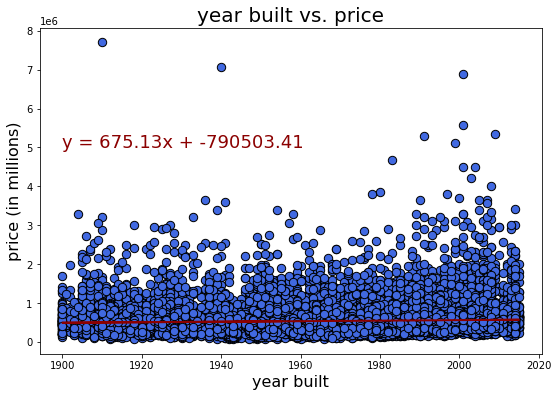

In [12]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = house_data_df['yr_built']
y_values = house_data_df['price']

# Perform a linear regression on wind speed vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('year built vs. price', fontsize=20)
plt.ylabel('price (in millions)', fontsize=16, color='black')
plt.xlabel('year built', fontsize=16, color='black')
plt.annotate(line_eq,(1900,5e6), fontsize=18, color='darkred')

# Print r-squared value:
print(f'The r-squared is: {rvalue}')

# Save the figure:
plt.savefig('output_data/yearbuiltvsprice.png')

# Show plot:
plt.show()

For the graph above, it appears that there is not a strong correlation between year built and price. Folks buying homes seem to desire older homes in a similar distribution to newer ones and are willing to pay similar prices.

Scatter plot with linear regression and r-squared value (yr_renovated vs. price) 

The r-squared is: 0.12792638428182118


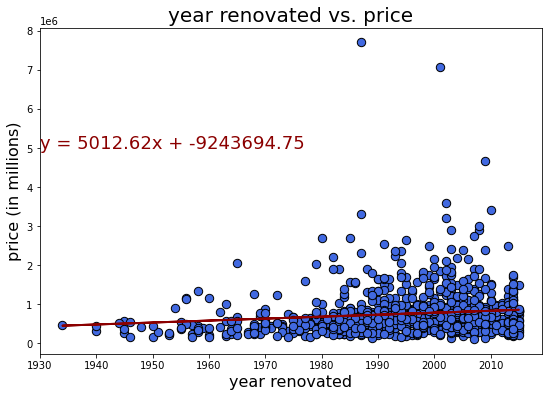

In [22]:
renovated_df = kc_house_data_df[["id", "lat", "long","zipcode", "price", "yr_renovated"]]
renovated_df = renovated_df[renovated_df["yr_renovated"] > 0]

# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = renovated_df['yr_renovated']
y_values = renovated_df['price']

# Perform a linear regression on wind speed vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('year renovated vs. price', fontsize=20)
plt.ylabel('price (in millions)', fontsize=16, color='black')
plt.xlabel('year renovated', fontsize=16, color='black')
plt.annotate(line_eq,(1930,5e6), fontsize=18, color='darkred')

# Print r-squared value:
print(f'The r-squared is: {rvalue}')

# Save the figure:
plt.savefig('output_data/yearrenovatedvsprice.png')

# Show plot:
plt.show()

In the graph above we see that there is a stronger correlation between price and year renovated. It seems that folks buying homes do tend to pay more for homes that are renovated, regardless of the year originally built.

Dataframe for top 6 most newly built houses include lat, lng, House ID, Price, and yr_built columns

In [20]:
top_six_new_df = house_data_df.sort_values("yr_built", ascending=False)
top_six_new_df = top_six_new_df[["id", "lat", "long", "zipcode", "price", "yr_built"]]
top_six_new_df = top_six_new_df.head(6)
top_six_new_df

,id,lat,long,zipcode,price,yr_built
21369,923059259,47.4917,-122.170,98056,455950.0,2015
1763,1832100030,47.5784,-122.226,98040,597326.0,2015
21262,5694500840,47.6611,-122.346,98103,559000.0,2015
14215,8156600210,47.6782,-122.299,98115,1290000.0,2015
20852,1257201420,47.6725,-122.330,98103,595000.0,2015
20963,6058600220,47.5951,-122.301,98144,230000.0,2015


Dataframe for top 6 recently renovated houses include lat, lng, House ID, Price, and yr_renovated columns

In [21]:
renovated_df = top_six_renovated.sort_values("yr_renovated", ascending=False)
top_six_renovated = top_six_renovated.head(6)
top_six_renovated

,id,lat,long,zipcode,price,yr_renovated
5683,2202500255,47.5731,-122.135,98006,335000.0,2015
19444,582000644,47.6515,-122.397,98199,872500.0,2015
14859,3585900665,47.7608,-122.378,98177,805000.0,2015
18575,8935100100,47.6763,-122.282,98115,476000.0,2015
7097,9141100005,47.7412,-122.355,98133,285000.0,2015
3156,6821100195,47.6563,-122.401,98199,830000.0,2015


Plot markers for the top 6 most newly built houses using lat and lng on a map with pins containing House ID, Price, and yr_built

Group data frame by zip code, show the zipcodes with the newest houses along with average price, and number of houses per zip code

In [11]:
zipcode_df = house_data_df[["id", "zipcode", "price", "yr_built"]]
zipcode_df = zipcode_df.groupby(["zipcode"])
newest = zipcode_df["yr_built"].max()
price_mean = zipcode_df["price"].mean()
house_count = zipcode_df["id"].count()
zipcode_gb_df= pd.DataFrame({"id": house_count, "yr_built": newest, "price": price_mean})

zipcode_gb_df = zipcode_gb_df.sort_values("yr_built", ascending=False)
zipcode_gb_df.head()

,id,yr_built,price
zipcode,,,
98199,317,2015,792187.873817
98028,283,2015,462488.869258
98072,273,2015,570073.520147
98065,310,2015,528003.138710
98103,602,2015,585048.779070
